In [1]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

### 구 상권 생활인구
- 각 상권별 성별, 연령대, 시간별 생활인구 데이터

In [2]:
df = pd.read_csv('../../dataSet/01_구_상권_생활인구/서울시_우리마을가게_상권분석서비스(구_상권_생활인구)_2021년.csv', encoding='cp949')
pop = df.loc[:,
    [
        '기준 년코드',
        '기준_분기_코드',
        '상권_구분_코드',
        '상권_코드',
        '상권_코드_명',
        '총_생활인구_수',
        '남성_생활인구_수',
        '여성_생활인구_수',
        '연령대_10_생활인구_수',
        '연령대_20_생활인구_수',
        '연령대_30_생활인구_수',
        '연령대_40_생활인구_수',
        '연령대_50_생활인구_수',
        '연령대_60_이상_생활인구_수',
        '시간대_1_생활인구_수',
        '시간대_2_생활인구_수',
        '시간대_3_생활인구_수',
        '시간대_4_생활인구_수',
        '시간대_5_생활인구_수',
        '시간대_6_생활인구_수',
        '월요일_생활인구_수',
        '화요일_생활인구_수',
        '수요일_생활인구_수',
        '목요일_생활인구_수',
        '금요일_생활인구_수',
        '토요일_생활인구_수',
        '일요일_생활인구_수'
    ]
]
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5980 entries, 0 to 5979
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   기준 년코드            5980 non-null   int64 
 1   기준_분기_코드          5980 non-null   int64 
 2   상권_구분_코드          5980 non-null   object
 3   상권_코드             5980 non-null   int64 
 4   상권_코드_명           5980 non-null   object
 5   총_생활인구_수          5980 non-null   int64 
 6   남성_생활인구_수         5980 non-null   int64 
 7   여성_생활인구_수         5980 non-null   int64 
 8   연령대_10_생활인구_수     5980 non-null   int64 
 9   연령대_20_생활인구_수     5980 non-null   int64 
 10  연령대_30_생활인구_수     5980 non-null   int64 
 11  연령대_40_생활인구_수     5980 non-null   int64 
 12  연령대_50_생활인구_수     5980 non-null   int64 
 13  연령대_60_이상_생활인구_수  5980 non-null   int64 
 14  시간대_1_생활인구_수      5980 non-null   int64 
 15  시간대_2_생활인구_수      5980 non-null   int64 
 16  시간대_3_생활인구_수      5980 non-null   int64 
 17  시간대_4_생활인구_수  

In [3]:
pop.columns = [    
    [
        'year',
        'quarter',
        'c_area',
        'c_area_code',
        'c_area_name',
        'total_lifepop',
        'lifepop_man',
        'lifepop_woman',
        'lifepop_age_10',
        'lifepop_age_20',
        'lifepop_age_30',
        'lifepop_age_40',
        'lifepop_age_50',
        'lifepop_age_60',
        'lifepop_time_1',
        'lifepop_time_2',
        'lifepop_time_3',
        'lifepop_time_4',
        'lifepop_time_5',
        'lifepop_time_6',
        'lifepop_week_mon',
        'lifepop_week_tue',
        'lifepop_week_wed',
        'lifepop_week_thu',
        'lifepop_week_fri',
        'lifepop_week_sat',
        'lifepop_week_sun'
    ]
]

In [4]:
pop

,year,quarter,c_area,c_area_code,c_area_name,total_lifepop,lifepop_man,lifepop_woman,lifepop_age_10,lifepop_age_20,...,lifepop_time_4,lifepop_time_5,lifepop_time_6,lifepop_week_mon,lifepop_week_tue,lifepop_week_wed,lifepop_week_thu,lifepop_week_fri,lifepop_week_sat,lifepop_week_sun
0,2021,1,A,1000001,계동길,282796,142207,140590,34007,40035,...,47847,46527,27332,42432,44311,43579,43185,41685,34576,33028
1,2021,1,A,1000002,난계로27길,320864,164461,156403,16361,61774,...,50951,46326,33033,45027,45415,45956,45149,44570,46564,48182
2,2021,1,A,1000003,돈화문로11가길,162400,90505,71895,9073,32314,...,32446,32562,12871,23640,25007,25436,24577,24013,21348,18378
3,2021,1,A,1000004,명륜길,626489,297916,328574,82087,234185,...,67979,91973,81483,89079,89895,89409,89494,88104,89231,91277
4,2021,1,A,1000005,백석동길,172515,80100,92415,21801,20920,...,18046,25092,22338,24174,24146,24254,24173,24488,25363,25916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5975,2021,4,U,1001492,명동 남대문 북창동 다동 무교동 관광특구,3954704,2007791,1946913,131802,728140,...,945620,757425,205182,582190,651911,662500,660551,645755,423363,328433
5976,2021,4,U,1001493,동대문패션타운 관광특구,3218311,1544837,1673475,128933,584937,...,447697,512591,405488,480120,506022,506556,506558,498361,391061,329634
5977,2021,4,U,1001494,종로·청계 관광특구,3868466,2102996,1765468,124708,651068,...,807412,739611,302155,579395,620051,625430,625190,616411,463525,338464
5978,2021,4,U,1001495,잠실 관광특구,3371333,1642782,1728551,336818,754106,...,546549,724599,375897,471969,479673,485521,486816,489461,497158,460732


In [5]:
'''
상권구분코드
A = 골목상권
D = 발달상권
R = 전통시장
U = 관광특구
'''
pop['c_area'].value_counts()

A    4040
D    1012
R     904
U      24
Name: c_area, dtype: int64

In [6]:
# 상권코드
pop[['year','quarter']].value_counts()

year  quarter
2021  1          1495
      2          1495
      3          1495
      4          1495
dtype: int64

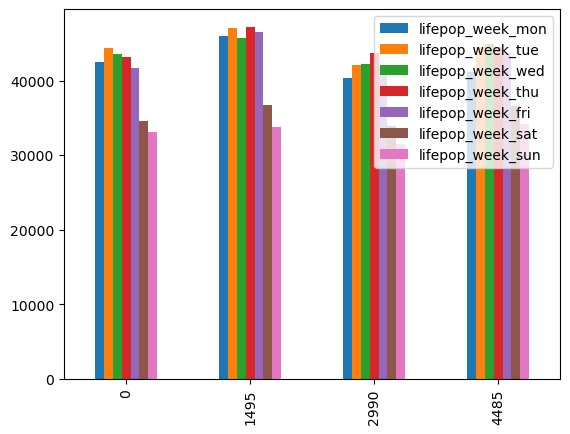

In [7]:
# 상권 분기별 요일별 생활인구 확인 
c_code = 1000001 # 상권코드
week = pop[pop['c_area_code'] == c_code][[
    'lifepop_week_mon',
    'lifepop_week_tue',
    'lifepop_week_wed',
    'lifepop_week_thu',
    'lifepop_week_fri',
    'lifepop_week_sat',
    'lifepop_week_sun']]
week.plot(kind='bar')
plt.show()

### 구 상권 상주인구
- 각 상권별 성별, 연령대, 시간별 상주인구 데이터

In [27]:
live = pd.read_csv('../../dataSet/01_구_상권_상주인구.csv', encoding='cp949')
live = live.loc[:,[
    '기준_년_코드',
    '기준_분기_코드',
    '상권_구분_코드',
    '상권 코드',
    '상권 코드 명',
    '총 가구 수',
    '아파트 가구 수',
    '비 아파트 가구 수',
    '총 상주인구 수',
    '남성 상주인구 수',
    '여성 상주인구 수',
    '연령대 10 상주인구 수',
    '연령대 20 상주인구 수',
    '연령대 30 상주인구 수',
    '연령대 40 상주인구 수',
    '연령대 50 상주인구 수',
    '연령대 60 이상 상주인구 수'
]]

In [28]:
live

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권 코드,상권 코드 명,총 가구 수,아파트 가구 수,비 아파트 가구 수,총 상주인구 수,남성 상주인구 수,여성 상주인구 수,연령대 10 상주인구 수,연령대 20 상주인구 수,연령대 30 상주인구 수,연령대 40 상주인구 수,연령대 50 상주인구 수,연령대 60 이상 상주인구 수
0,2021,1,A,1000002,난계로27길,854,0,854,941,406,535,18,437,252,88,69,77
1,2021,1,A,1000011,숭인동길,520,0,520,899,484,415,75,136,102,109,191,286
2,2021,1,A,1000010,성균관로5길,603,0,603,946,454,492,94,341,137,106,104,164
3,2021,1,A,1000012,옥인길,1095,0,1095,2571,1139,1432,432,288,399,506,412,534
4,2021,1,R,1001451,사당시장,3,0,3,8,5,3,0,3,1,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45785,2014,4,A,1000429,진흥로12길,0,0,0,3955,2023,1932,169,500,1222,1011,782,271
45786,2014,4,A,1000367,도봉산4길,0,0,0,59,32,27,2,9,10,12,12,14
45787,2014,4,A,1000621,고척로21나길,0,0,0,2570,1304,1266,77,137,752,752,752,100
45788,2014,4,A,1000385,석계로1길,0,0,0,818,437,381,81,137,188,160,171,81


In [29]:
live.columns = [
    [
        'year',
        'quarter',
        'c_area',
        'c_area_code',
        'c_area_name',
        'total_house',
        'apt_house',
        'non_apt_house',
        'total_alltime_pop',
        'alltime_pop_man',
        'alltime_pop_woman',
        'alltime_pop_age10',
        'alltime_pop_age20',
        'alltime_pop_age30',
        'alltime_pop_age40',
        'alltime_pop_age50',
        'alltime_pop_age60'
    ]
]
live

,year,quarter,c_area,c_area_code,c_area_name,total_house,apt_house,non_apt_house,total_alltime_pop,alltime_pop_man,alltime_pop_woman,alltime_pop_age10,alltime_pop_age20,alltime_pop_age30,alltime_pop_age40,alltime_pop_age50,alltime_pop_age60
0,2021,1,A,1000002,난계로27길,854,0,854,941,406,535,18,437,252,88,69,77
1,2021,1,A,1000011,숭인동길,520,0,520,899,484,415,75,136,102,109,191,286
2,2021,1,A,1000010,성균관로5길,603,0,603,946,454,492,94,341,137,106,104,164
3,2021,1,A,1000012,옥인길,1095,0,1095,2571,1139,1432,432,288,399,506,412,534
4,2021,1,R,1001451,사당시장,3,0,3,8,5,3,0,3,1,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45785,2014,4,A,1000429,진흥로12길,0,0,0,3955,2023,1932,169,500,1222,1011,782,271
45786,2014,4,A,1000367,도봉산4길,0,0,0,59,32,27,2,9,10,12,12,14
45787,2014,4,A,1000621,고척로21나길,0,0,0,2570,1304,1266,77,137,752,752,752,100
45788,2014,4,A,1000385,석계로1길,0,0,0,818,437,381,81,137,188,160,171,81


### 구 상권 직장인구
- 각 상권별 성별, 연령대, 시간별 직장인구 데이터

In [31]:
work = pd.read_csv('../../dataSet/01_구_상권_직장인구.csv', encoding='cp949')
work = work.loc[:,[
    '기준_년월_코드',
    '기준_분기_코드',
    '상권_구분_코드',
    '상권_코드',
    '상권_코드_명',
    '총_직장_인구_수',
    '남성_직장_인구_수',
    '여성_직장_인구_수',
    '연령대_10_직장_인구_수',
    '연령대_20_직장_인구_수',
    '연령대_30_직장_인구_수',
    '연령대_40_직장_인구_수',
    '연령대_50_직장_인구_수',
    '연령대_60_이상_직장_인구_수',
]]

In [32]:
work.columns = [
    [
        'year',
        'quarter',
        'c_area',
        'c_area_code',
        'c_area_name',
        'total_work_pop',
        'work_pop_man',
        'work_pop_woman',
        'work_pop_age10',
        'work_pop_age20',
        'work_pop_age30',
        'work_pop_age40',
        'work_pop_age50',
        'work_pop_age60'
    ]
]
work

,year,quarter,c_area,c_area_code,c_area_name,total_work_pop,work_pop_man,work_pop_woman,work_pop_age10,work_pop_age20,work_pop_age30,work_pop_age40,work_pop_age50,work_pop_age60
0,2021,1,A,1000007,북촌로5길,503,419,84,0,31,177,156,102,37
1,2021,1,A,1000756,사당로8길,131,70,61,0,16,19,41,37,18
2,2021,1,R,1001278,남평화시장,5,3,2,0,0,4,0,0,1
3,2021,1,A,1000058,백범로90길,535,288,247,0,62,133,161,112,67
4,2021,1,A,1000059,서빙고로71길,432,265,167,1,40,104,117,81,89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43227,2014,4,A,1000673,시흥대로141길,667,410,257,6,133,198,154,139,37
43228,2014,4,A,1000496,와우산로3길,177,105,72,2,33,68,47,24,3
43229,2014,4,A,1000705,도신로60길,87,14,73,0,5,9,14,18,41
43230,2014,4,D,1001255,서울 은평구 연신내역_3,550,174,376,1,125,150,128,87,59
